In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
data = pd.read_excel("C:/Users/joujo/Documents/Master_Thesis/Prediction/Correlation.xlsx")

data3=pd.read_excel("C:/Users/joujo/Documents/Master_Thesis/Prediction/Correlation_Test.xlsx")


In [3]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

In [4]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

# ------------------------------------------------------------------------------------------
# Analysis of the correlation between variables 
# ------------------------------------------------------------------------------------------
def plot_corr(data):
    X         = [label for label in data]
    N         = data.shape[1]
    corr      = (data.corr()).values

    # Display the correlation in cells
    hovertext = [[f'corr({X[i]}, {X[j]})= {corr[i][j]:.2f}' for j in range(N)] for i in range(N)]

    sns_colorscale = [[0.0, '#3f7f93'], 
     [0.071, '#5890a1'],
     [0.143, '#72a1b0'],
     [0.214, '#8cb3bf'],
     [0.286, '#a7c5cf'],
     [0.357, '#c0d6dd'],
     [0.429, '#dae8ec'],
     [0.5, '#f2f2f2'],
     [0.571, '#f7d7d9'],
     [0.643, '#f2bcc0'],
     [0.714, '#eda3a9'],
     [0.786, '#e8888f'],
     [0.857, '#e36e76'],
     [0.929, '#de535e'],
     [1.0, '#d93a46']]

    heat = go.Heatmap(z=data.corr(),
                      x=X,
                      y=X,
                      zmin=-1,
                      zmax=1,
                      xgap=1, ygap=1,
                      colorscale=sns_colorscale,
                      colorbar_thickness=20,
                      colorbar_ticklen=3,
                      hovertext=hovertext,
                      hoverinfo='text')

    title = 'Correlation Matrix'               
    layout = go.Layout(title_text=title, title_x=0.5, 
                       width=600, height=600,
                       xaxis_showgrid=False,
                       yaxis_showgrid=False,
                       yaxis_autorange='reversed')

    fig=go.Figure(data=[heat], layout=layout)  
    fig.show()

In [5]:
dataT = pd.read_excel("C:/Users/joujo/Documents/Master_Thesis/Prediction/Correlation_sansPatient.xlsx")

In [6]:
dfT = pd.DataFrame(dataT)

In [7]:
dfT2=dfT.dropna()

In [9]:
plot_corr(dfT2)

In [10]:
col1=dfT2.iloc[:,0:12]
col2=dfT2.iloc[:,12:53]



In [11]:
for i in col1:
    for j in col2:
        if i != j:
            corr_coef = dfT2[i].corr(dfT2[j])
            #print(corr_coef)
    
            if (corr_coef>0.5 or corr_coef<-0.5):
                print("correlation de : ")
                print(corr_coef)
                print("entre")
                print(i)
                print(j)


correlation de : 
-0.5444325666722742
entre
M6_AC_4
mean_FA_CC_GENU
correlation de : 
-0.6100263620989607
entre
M6_AC_4
max_FA_CC_GENU
correlation de : 
-0.5257568275623297
entre
M6_AWRS_CI
mean_FA_CC_SPLENIUM
correlation de : 
-0.5057671001778192
entre
M6_list
TrackCount_IFOF_L
correlation de : 
0.5573611873794435
entre
M6_dewa_AV
mean_FA_UF_L


In [12]:
col_means =dfT.mean()

print(col_means)
# fill NaN values with the mean of their respective column
dfT = dfT.fillna(value=col_means)

M6_AC_0.5                   31.309524
M6_AC_1                     29.404762
M6_AC_2                     32.500000
M6_AC_4                     34.166667
M6_WRS_CI_65dB               0.614286
M6_AWRS_CI                   0.457143
M6_list                      2.928571
M6_CAP                       5.891892
M6_SIR                       4.864865
M6_dewa_AV                   0.515625
M6_dewa_A                    0.406061
M6_dewa_diff                 0.112500
mean_FA_AF_L                 0.427393
max_FA_AF_L                  0.726468
min_FA_AF_L                  0.022389
std_AF_L                     0.100031
TrackCount_AF_L           4826.148148
mean_FA_IFOF_L               0.509533
max_FA_IFOF_L                0.588501
min_FA_IFOF_L                0.421334
std_IFOF_L                   0.035109
TrackCount_IFOF_L           68.592593
mean_FA_IFOF_R               0.507654
max_FA_IFOF_R                0.585586
min_FA_IFOF_R                0.417099
std_IFOF_R                   0.036181
TrackCount_I

In [13]:
for col1 in dfT.columns:
    for col2 in dfT.columns:
        if col1 != col2:
            corr_coef = dfT[col1].corr(dfT[col2])
            print(corr_coef)

0.8165152444312122
0.6257015519710594
0.6237231904054997
-0.3506549982724185
-0.46886892120837065
-0.31432344726161177
-0.213060313113017
-0.3342466034556085
-0.20947748793160464
-0.06400333523958937
-0.15609552629302334
0.06543889023120943
0.04174915505752943
-0.12568881884028824
0.303991910885659
-0.035483751818765244
0.08407338095829212
-0.03750852505179202
0.13122543894760083
-0.16334076604130052
-0.18726679510051955
0.03650053371766725
0.12559327456438496
-0.060728498664205245
0.3493608893020671
-0.1326616235738164
-0.22322259239047698
-0.15742181079521927
-0.0799662841867829
0.10389328028035703
-0.1725630406823005
-0.041894192787506064
-0.013053558560545546
-0.19148177475445669
0.2795692121029468
-0.05804911407466673
-0.07824095648557908
-0.12159332418034964
-0.016592292054273698
0.011442045300685799
-0.2675115141526132
0.0022935873288006084
0.03982209048704155
-0.09025997193540397
0.1685592187305088
-0.28606772631287175
0.17599664437149903
0.317387241258453
-0.05363707283230637


0.11056640147694065
0.07015398178128311
0.05958971681366737
0.3520469611154041
0.01675809676481
0.12066671889661151
-0.002291939832587844
0.10991660350437255
0.24358407569531623
0.18372247103774422
0.16954644944005437
0.1910909662867299
0.08191065852561845
0.05316581042662513
0.23431347098598462
0.434058724881501
0.17799528578833124
-0.04183766928849405
0.19429494974738962
0.1670059527649737
0.13575939556230993
0.12916131391338126
0.03999151961786735
-0.254520469689278
-0.12568881884028824
-0.1206644626393001
-0.1074006516827814
-0.07878820353345395
-0.037114281680571994
0.09162676606944337
0.07751678531951442
-0.07582658776257875
0.1316443660082432
0.0598523218341261
-0.18388477371073528
0.2735209721393395
0.16603900322551576
-0.2806380896830267
-0.2974755288304164
0.3936666991032613
0.10001395624404165
0.1968477225260572
-0.007254815622563148
0.21945647463928977
0.13535653953364984
0.11403813896827782
0.1539280807054664
-0.04117183330627913
0.1317562512357675
0.16432053237274377
0.19

-0.10908001654275747
0.3684072531136868
0.14208862357687718
0.24006362540515666
0.4664905161719101
0.05696551482113164
0.19721894872772053
-0.3024283117711701
0.4002791398657355
0.3107725171980556
0.3573273769889122
0.20553525811455725
0.07922844066844283
0.4200296546237874
0.15284344869865346
0.10540615654566043
0.1460517949155599
-0.14596813373018336
0.3016529277409117
0.744644398254373
0.5342190171412311
-0.12945182409429276
0.0932130809646185
0.5563392161776458
0.11147909691013917
0.29770859743034433
-0.29468146824021546
0.05339036791716273
0.3326050823413192
0.23970291066758898
0.3596534667545848
-0.16835510638767254
0.1429451716539825
0.2937667156072281
0.08840282295446285
0.33964561175568003
-0.4569137362731123
0.16158659553911672
0.07437632468429557
-0.19642438476759302
0.30574192308861065
-0.4095173095002941
0.12198378294792785
-0.15742181079521927
-0.1950179991651016
-0.20654345029056137
-0.2496578260490428
0.15305124711953663
0.13998992139129351
-0.05496183640968327
0.090877

0.05384060460690274
0.9192467411457278
0.5043516883169457
0.48474206998273367
0.2223032182139103
0.7620421275576552
0.537159131720828
0.5563014565809833
-0.3829331451191334
-0.011273147399631965
-0.005083163836329921
0.06602691932929207
0.2733073179295278
0.03913644630003125
0.10100350252779962
-0.016592292054273695
-0.03045895491481844
0.12758454226417737
-0.07761782315524349
0.05930740379019466
-0.014236834566726973
-0.17725508184441993
-0.13606517062706888
-0.01838981872569288
0.20986657800776357
0.010545261378559117
0.20878798210444904
0.5260569844540421
0.1910909662867299
0.22481403874462588
-0.31331589141228783
0.4664692416576116
0.28292158802655976
0.32348076923881125
0.09682102836877629
0.2451921401847031
0.3371922810138033
0.16790060075042854
0.1994787281138414
0.1558684649156432
-0.018376027808715882
0.30154951830476084
0.35965346675458487
0.2768087483621825
0.12657210248987774
-0.02946163807182283
0.16168718193413045
0.1418351145146463
-0.12527576965664736
0.1113986110212239

-0.2585613812603588
0.22871730156567907
0.012190688003499874
0.10100350252779962
-0.028044373442446455
-0.08760449925074364
0.3805396626633088
0.0031796865954975243
-0.08484764456133934
0.07949032265843702
-0.21586157609134005
0.4160757844249879
-0.27520196693357085
-0.03958384289185115
0.06352320408301192
-0.09249586915207463


In [76]:
corr_matrix=dfT.corr()
print(corr_matrix)

                        M6_AC_0.5   M6_AC_1   M6_AC_2   M6_AC_4  \
M6_AC_0.5                1.000000  0.805586  0.610714  0.626184   
M6_AC_1                  0.805586  1.000000  0.700081  0.732589   
M6_AC_2                  0.610714  0.700081  1.000000  0.738596   
M6_AC_4                  0.626184  0.732589  0.738596  1.000000   
M6_WRS_CI_65dB          -0.356628 -0.435965 -0.452023 -0.386696   
M6_AWRS_CI              -0.472133 -0.476475 -0.533661 -0.424882   
M6_list                 -0.288117 -0.240493 -0.252571 -0.230577   
M6_CAP                  -0.208505 -0.128454 -0.265623 -0.315726   
M6_SIR                  -0.317052 -0.096146  0.001724 -0.116740   
M6_dewa_AV              -0.214773 -0.294536 -0.332488 -0.405395   
M6_dewa_A               -0.005712 -0.121373 -0.117675 -0.186254   
M6_dewa_diff            -0.162667 -0.132756 -0.099896 -0.149914   
mean_FA_AF_L             0.078765  0.091024 -0.071138 -0.011527   
max_FA_AF_L              0.041045  0.085702 -0.024404 -0.06933

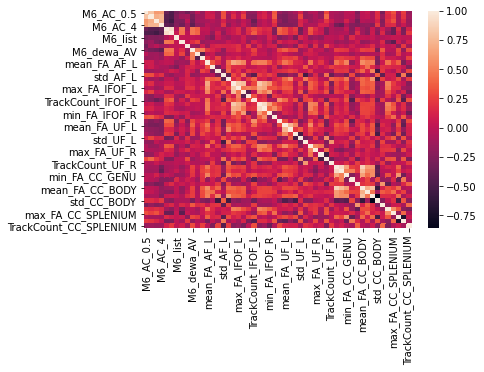

In [77]:
sns.heatmap(corr_matrix, annot=False)

# Afficher la carte thermique
plt.show()

In [14]:
plot_corr(dfT)

In [79]:
col1=dfT.iloc[:,0:12]
col2=dfT.iloc[:,12:53]



In [80]:
for i in col1:
    for j in col2:
        if i != j:
            corr_coef = dfT[i].corr(dfT[j])
            #print(corr_coef)
    
            if (corr_coef>0.5 or corr_coef<-0.5):
                print("correlation de : ")
                print(corr_coef)
                print("entre")
                print(i)
                print(j)